## **Introduction**
This project involves building a spam detection model using the Naive Bayes classifier on the SMS Spam dataset.
We will use text preprocessing techniques like the bag-of-words model and TF-IDF to convert textual data into
numerical format. The Naive Bayes algorithm is particularly suited for text classification tasks due to its
simplicity and efficiency.

**Key Steps in This Notebook:**
1. Loading and exploring the dataset.
2. Text preprocessing: tokenization, stopword removal, and feature extraction.
3. Training the Naive Bayes classifier.
4. Evaluating the model's performance.


In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')



In [2]:
# Load the SMS Spam Dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/sms_spam.csv"
data = pd.read_csv(url, encoding='latin-1')

# Display first few rows
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## **About the Dataset**
The dataset contains two columns:
1. **Type**: Indicates whether the message is 'ham' (not spam) or 'spam'.
2. **Message**: The SMS text message.

**Example Rows:**
- Type: Spam | Message: "Free entry in 2 a weekly competition..."
- Type: Ham  | Message: "Hey, are we meeting today?"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


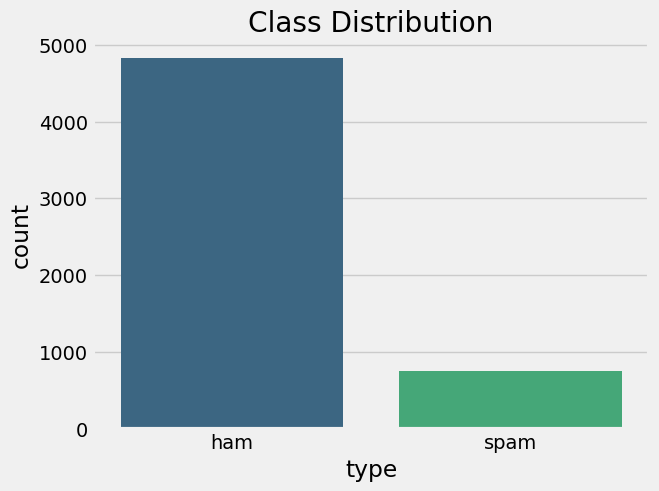

,type,text
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


In [8]:
# Check dataset info
data.info()

# Check class distribution
sns.countplot(x='type', data=data, palette='viridis')
plt.title('Class Distribution')
plt.show()

# Display summary statistics
data.describe()

## **EDA Insights**
- The dataset is imbalanced, with more 'ham' messages than 'spam'.
- Text preprocessing is essential to handle the variability in the messages.


In [10]:
# Convert labels to binary values
data['label'] = data['type'].map({'ham': 0, 'spam': 1})

# Tokenization and vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data['text'])
y = data['label']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## **Text Preprocessing**
1. **Label Encoding**: Convert 'ham' to 0 and 'spam' to 1 for binary classification.
2. **TF-IDF Vectorization**:
    - Converts text into numerical features.
    - Assigns weights to words based on their frequency and importance.
3. **Train-Test Split**: Divides the dataset into training (70%) and testing (30%) subsets.


## **Understanding the Naive Bayes Algorithm**

Naive Bayes is a **probabilistic classification algorithm** based on Bayes' Theorem. It is widely used for tasks like spam detection, sentiment analysis, and text classification.

### **Bayes' Theorem**
Bayes' Theorem calculates the probability of a class (hypothesis) based on the given features (evidence):

P(H|E) = P(E|H) * P(H) / P(E)

Where:  
- **P(H|E):** Posterior probability of the class \(H\) (e.g., spam or ham) given the evidence \(E\).  
- **P(E|H):** Likelihood of the evidence given the class \(H\).  
- **P(H):** Prior probability of the class \(H\) (how often it occurs).  
- **P(E):** Prior probability of the evidence \(E\) (a normalizing constant).

### **Naive Assumption**
The "naive" assumption is that **all features are independent** of each other. For example, in a text classification problem, the presence of one word is assumed to have no relation to the presence of another word.

### **How Naive Bayes Works**
1. Calculate the prior probabilities for each class:  
   P(H) = (Number of samples in class H) / (Total number of samples)

2. Calculate the likelihood for each feature given a class:  
   P(E|H) = (Number of times feature E occurs in class H) / (Total samples in class H)

3. Combine the probabilities using Bayes' Theorem:  
   P(H|E) ∝ P(E1|H) * P(E2|H) * ... * P(En|H) * P(H)

4. Predict the class with the **highest posterior probability**.

### **Example**
Consider a spam detection task where we classify a message as "spam" or "ham."  
- If "win" and "prize" appear in a message:  
   - P(spam|message) ∝ P(win|spam) * P(prize|spam) * P(spam)  
   - P(ham|message) ∝ P(win|ham) * P(prize|ham) * P(ham)  

The class with the higher posterior probability (spam or ham) is chosen as the prediction.




### **Why Use Naive Bayes for Text?**
- Efficient with high-dimensional data like text.
- Performs well with small datasets.
- Handles sparse data effectively.


In [17]:
# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


## **Model Training**
- **MultinomialNB**: A variant of Naive Bayes designed for text data, especially for word frequencies or TF-IDF values.
- The model learns probabilities of words given each class ('ham' or 'spam').


Accuracy: 0.9808726838015541

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1447
           1       1.00      0.86      0.92       226

    accuracy                           0.98      1673
   macro avg       0.99      0.93      0.96      1673
weighted avg       0.98      0.98      0.98      1673



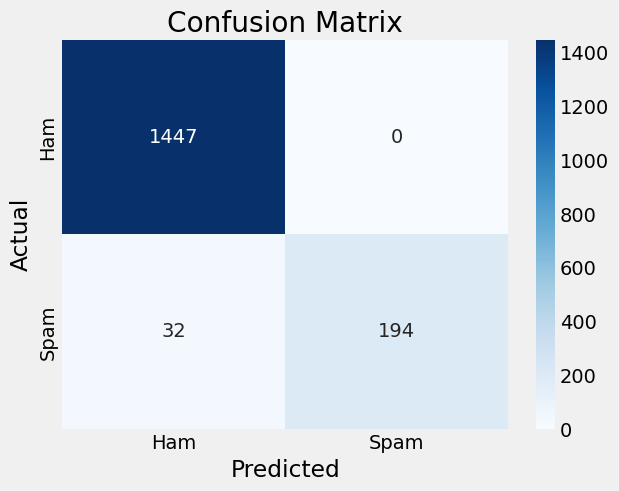

In [18]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### **Key Insights and Interpretations**  

- **High Overall Accuracy (98.1%):** The model reliably classifies messages, ensuring efficient spam detection with minimal errors.  
- **Excellent Ham Detection (Recall: 100%, F1: 99%):** All legitimate (ham) messages are correctly identified, avoiding disruptions to important communications.  
- **Strong Spam Precision (100%):** All messages flagged as spam are indeed spam, reducing false positives and maintaining trust in the system.  
- **Missed Spam Messages (Recall: 86%):** Some spam messages are not caught, which could expose users to unwanted or malicious content.  
- **Balanced Performance (Macro F1: 96%):** Despite minor weaknesses in spam recall, the model provides strong overall performance suitable for practical use.  